This notebook is used for generating different benchmark

In [5]:
from utils import convert_bytes
from payload_generator import generate_spectrum_pb, generate_spectrum_utf
from plots import plot_payload_size, plot_deserialisation_time
from producer import produce

## Spectrum

#### Payload Size

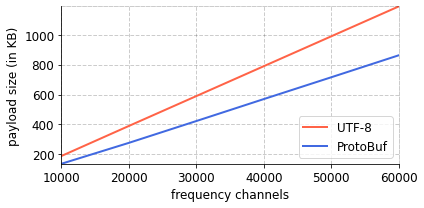

Task was destroyed but it is pending!
task: <Task pending name='Task-246' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7faaa1a874f0>()]> cb=[Sender._fail_all()]>


In [11]:
x = []
y1 = []
y2 = []
unit = "KB"

pb_payloads = []
utf_payloads = []

for i in range(10000, 70000, 10000):
    x.append(i)

    payload, size = generate_spectrum_utf(i)
    y1.append(convert_bytes(size, unit))
    utf_payloads.append([payload])

    payload, size = generate_spectrum_pb(i)
    y2.append(convert_bytes(size, unit))
    pb_payloads.append(payload)

plot_payload_size(x, y1, y2, unit)


#### Deserialization Time

In [13]:
from time import sleep

print(len(x))

for d in pb_payloads:
    await produce(d, "spectrum-pb")
    sleep(.001)

Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7faaa185acd0>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7faaa1ab0460>


6
produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=215, timestamp=1644581095811, timestamp_type=0)
produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=216, timestamp=1644581095846, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7faaa1ab0100>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7faaa1ab0100>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=217, timestamp=1644581095923, timestamp_type=0)
produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=218, timestamp=1644581096041, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7faaa169ceb0>
Task was destroyed but it is pending!
task: <Task pending name='Task-318' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7faaa18c8be0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-328' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7faaa1757190>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-338' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/p

produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=219, timestamp=1644581096199, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7faaa169ceb0>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=220, timestamp=1644581096400, timestamp_type=0)


### Deserialisation Cost

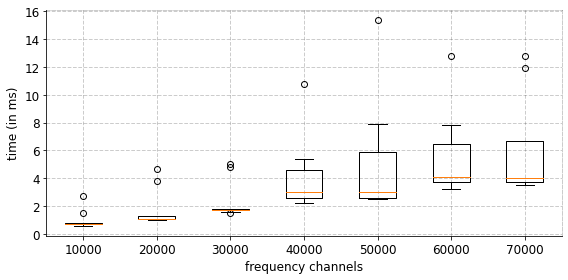

In [4]:

data_1 = [2.699999999254942, 1.5, 0.7000000011175871, 0.8000000007450581, 0.6000000014901161, 0.7999999988824129, 0.6999999992549419, 0.6999999992549419, 0.6999999992549419]
data_2 = [3.800000000745058, 4.699999999254942, 1.200000001117587, 1.299999998882413, 1.099999999627471, 1.099999999627471, 1.099999999627471, 1.099999999627471, 1]
data_3 = [4.800000000745058, 5, 1.700000001117587, 1.800000000745058, 1.6000000014901161, 1.700000001117587, 1.5, 1.699999999254942, 1.699999999254942]
data_4 = [10.800000000745058, 3, 5.400000000372529, 2.599999999627471, 3.300000000745058, 2.599999999627471, 4.600000001490116, 2.200000001117587, 2.900000000372529]
data_5 = [15.400000000372529, 7.900000000372529, 5.900000000372529, 2.5, 3.5, 2.599999999627471, 2.599999999627471, 2.899999998509884, 3]
data_6 = [12.799999998882413, 7.800000000745058, 6.5, 4.099999999627471, 3.199999999254942, 3.699999999254942, 3.5, 3.700000001117587, 4.400000000372529]
data_7 = [12.800000000745058, 11.900000000372529, 6.699999999254942, 3.699999999254942, 4, 3.599999999627471, 4.300000000745058, 3.5, 3.900000000372529]

y = [data_1, data_2, data_3, data_4, data_5, data_6, data_7]
x = [10000, 20000, 30000, 40000, 50000, 60000, 70000]

plot_deserialisation_time(y, x)

### Spectrogram

### Windmap

### Misc